In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [3]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 26us/sample - loss: 0.6933 - val_loss: 0.6932
Epoch 2/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6932 - val_loss: 0.6931
Epoch 3/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.6931 - val_loss: 0.6931
Epoch 4/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6930 - val_loss: 0.6930
Epoch 5/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6929 - val_loss: 0.6929
Epoch 6/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6928 - val_loss: 0.6928
Epoch 7/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6927 - val_loss: 0.6927
Epoch 8/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.6926 - val_loss: 0.6926
Epoch 9/100
60000/60000 [==============================] - 1s 12us/sample - loss: 0.69

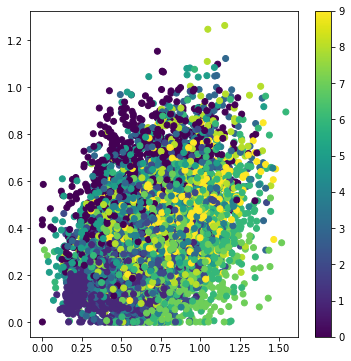

In [5]:
import matplotlib.pyplot as plt
encoder=Model(input_img, encoded)
x_test_encoded = encoder.predict(x_test, batch_size=256)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 10], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

# Ejercicio
Utiliza algun método de clustering de ML para hacer un clustering de las variables latentes. sabes que hay 10 clases, pero, ¿te sale que necesitas 10 clusters=


# K-Means

silhouette_score: The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for n_clusters in clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    preds = kmeans.fit_predict(x_test_encoded)
    centers = kmeans.cluster_centers_
    score = silhouette_score(x_test_encoded, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.244599387049675)
For n_clusters = 3, silhouette score is 0.1588047593832016)
For n_clusters = 4, silhouette score is 0.15032252669334412)
For n_clusters = 5, silhouette score is 0.1128237321972847)
For n_clusters = 6, silhouette score is 0.10895594209432602)
For n_clusters = 7, silhouette score is 0.09297230839729309)
For n_clusters = 8, silhouette score is 0.10441505163908005)
For n_clusters = 9, silhouette score is 0.09387703239917755)
For n_clusters = 10, silhouette score is 0.08721310645341873)
For n_clusters = 11, silhouette score is 0.08581632375717163)
For n_clusters = 12, silhouette score is 0.08831170946359634)


# DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps =.5, metric='euclidean',  min_samples=5, n_jobs = -1)
predict = dbscan.fit_predict(x_test_encoded)

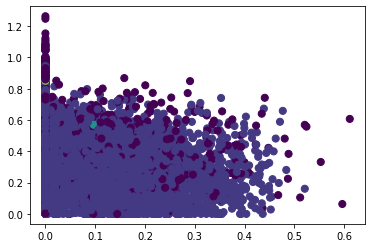

In [39]:
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=predict, s=50, cmap='viridis')

In [36]:
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 1336
